# Harris Corner Detection

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

%matplotlib inline

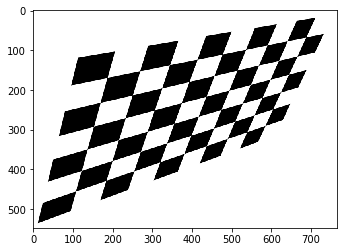

In [2]:
img = cv.imread('images/skewed_chessboard.png', cv.IMREAD_COLOR)

plt.imshow(img)
plt.show()

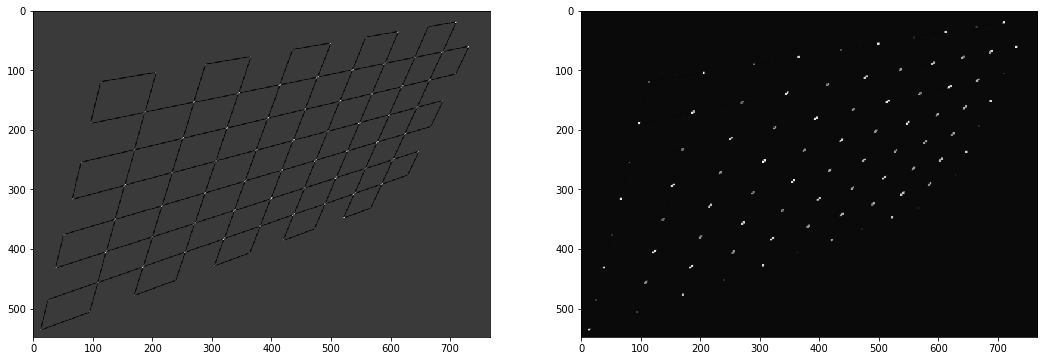

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

# blockSize Neighborhood size
# ksize Aperture parameter for the Sobel operator
# k Harris detector free parameter. See the formula above
harris = cv.cornerHarris(gray, blockSize=2, ksize=3, k=0.03)

# dilate corner points to enhance corner points
dst = cv.dilate(harris, None)

plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.imshow(harris, cmap='gray')
plt.subplot(122)
plt.imshow(dst, cmap='gray')
plt.show()

## Visualize corners

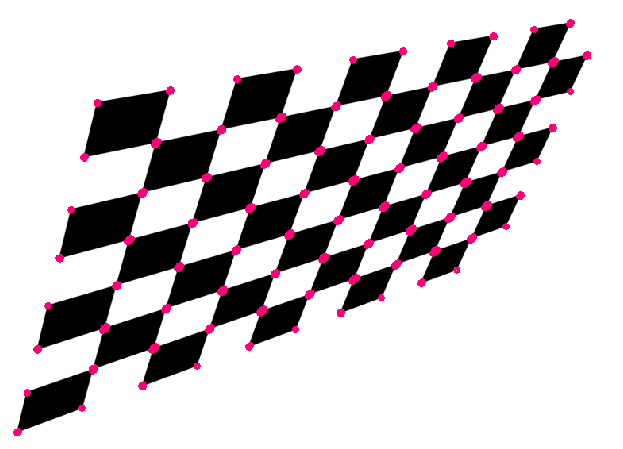

In [4]:
# threshold for an optimal value, it may vary depending on the image.
thresh = 0.05 * dst.max()

# obtain coordinates of corner elements (if they passed the threshold)
corners = np.argwhere(dst >= thresh)

# create an image copy to draw corners on
img_corners = np.copy(img)

# iterate through all the corners and draw them on the image 
for [y, x] in corners:
    # image, center pt, radius, color, thickness
    cv.circle(img_corners, (x, y), 3, (255, 0, 120), 1)

plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(img_corners)
plt.show()

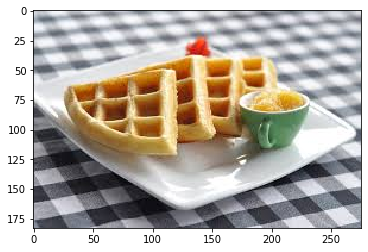

In [5]:
# read in the image
waffle_img = cv.imread('images/waffle.jpg')

# change color to RGB
waffle_img = cv.cvtColor(waffle_img, cv.COLOR_BGR2RGB)

plt.imshow(waffle_img)
plt.show()

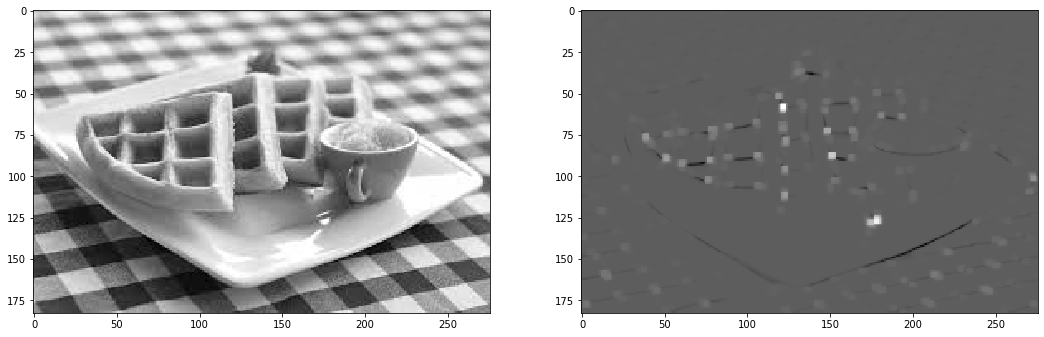

In [6]:
# convert to grayscale
waffle_gray = cv.cvtColor(waffle_img, cv.COLOR_RGB2GRAY)
waffle_gray = waffle_gray.astype('float32')

# detect corners 
waffle_harris = cv.cornerHarris(waffle_gray, 4, 3, 0.08)

# dilate corner image to enhance corner points
waffle_harris = cv.dilate(waffle_harris, None)

plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.imshow(waffle_gray, cmap='gray')
plt.subplot(122)
plt.imshow(waffle_harris, cmap='gray')
plt.show()

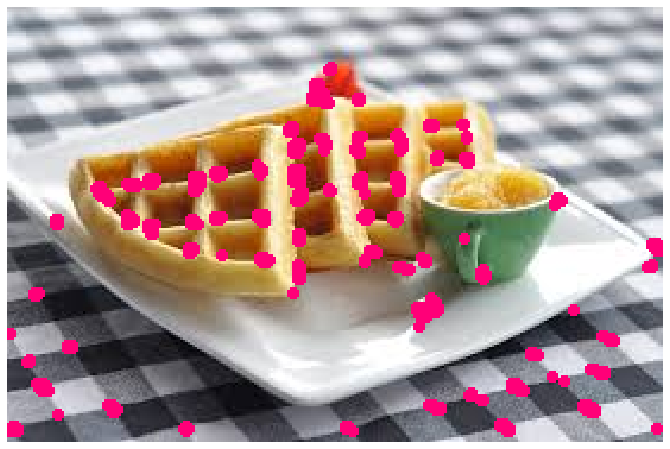

In [15]:
# threshold for an optimal value, it may vary depending on the image.
thresh = 0.05 * waffle_harris.max()

# obtain coordinates of corner elements (if they passed the threshold)
corners = np.argwhere(waffle_harris >= thresh)

# create an image copy to draw corners on
waffle_corners = np.copy(waffle_img)

# iterate through all the corners and draw them on the image 
for [y, x] in corners:
    # image, center pt, radius, color, thickness
    cv.circle(waffle_corners, (x, y), 1, (255, 0, 120), 1)

plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(waffle_corners)
plt.show()